### Can you actually even regress belief state value from beliefs?

In [1]:
%load_ext autoreload
%autoreload 2

import os
import numpy as np
import pandas as pd
import utils.behavioral_utils as behavioral_utils
import utils.information_utils as information_utils
import utils.visualization_utils as visualization_utils
import utils.pseudo_classifier_utils as pseudo_classifier_utils
import utils.classifier_utils as classifier_utils

import utils.io_utils as io_utils

import utils.glm_utils as glm_utils
from matplotlib import pyplot as plt
import matplotlib
import utils.spike_utils as spike_utils
import utils.subspace_utils as subspace_utils
from trial_splitters.condition_trial_splitter import ConditionTrialSplitter 
from utils.session_data import SessionData
from constants.behavioral_constants import *
from constants.decoding_constants import *
import seaborn as sns
from scripts.anova_analysis.anova_configs import *
from scripts.anova_analysis.run_anova import load_data
import scipy
import argparse
import copy
from spike_tools import (
    general as spike_general,
    analysis as spike_analysis,
)
import itertools
from tqdm import tqdm
from sklearn.linear_model import LinearRegression

In [2]:
subject = "SA"
sessions_path = f"/data/patrick_res/sessions/{subject}/valid_sessions.pickle"
valid_sess = pd.read_pickle(sessions_path)
all_beh = pd.concat(valid_sess.apply(lambda x: behavioral_utils.get_valid_belief_beh_for_sub_sess(subject, x.session_name), axis=1).values)

In [3]:
xs = all_beh[[f"{feat}Prob" for feat in FEATURES]]
ys = all_beh.BeliefStateValue.values.reshape(-1, 1)

In [4]:
model = LinearRegression()
model = model.fit(xs, ys)
score = model.score(xs, ys)
ys_pred = model.predict(xs)

Text(0.5, 1.0, 'Value predicted from beliefs, r: 0.119400')

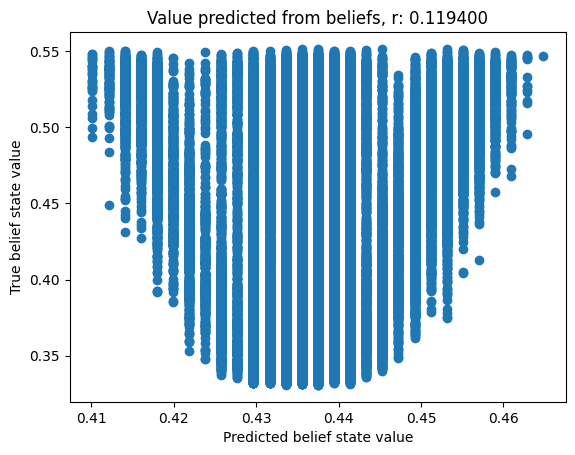

In [6]:
fig, ax = plt.subplots()
ax.scatter(ys_pred, ys)
ax.set_xlabel("Predicted belief state value")
ax.set_ylabel("True belief state value")
ax.set_title(f"Value predicted from beliefs, r: {np.sqrt(score):3f}")

In [7]:
xs_log = np.log(xs)
model = LinearRegression()
model = model.fit(xs_log, ys)
score = model.score(xs_log, ys)
ys_pred = model.predict(xs_log)

Text(0.5, 1.0, 'Value predicted from beliefs, r: 0.987556')

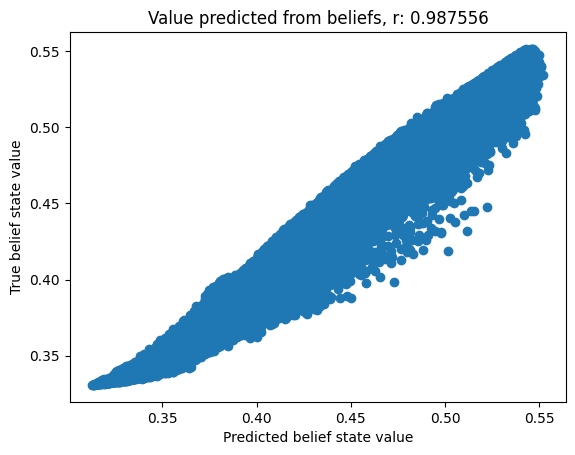

In [9]:
fig, ax = plt.subplots()
ax.scatter(ys_pred, ys)
ax.set_xlabel("Predicted belief state value")
ax.set_ylabel("True belief state value")
ax.set_title(f"Value predicted from beliefs, r: {np.sqrt(score):3f}")

In [10]:
all_beh[[f"{feat}LogProb" for feat in FEATURES]] = xs_log

<Axes: xlabel='CIRCLELogProb', ylabel='TRIANGLELogProb'>

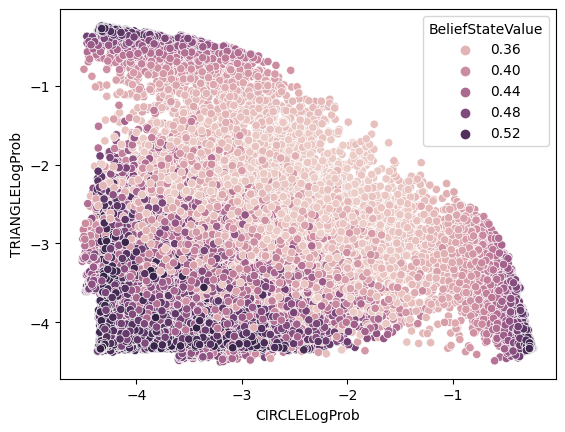

In [12]:
sns.scatterplot(all_beh, x="CIRCLELogProb", y="TRIANGLELogProb", hue="BeliefStateValue")